# ZGB Analysis:

In [108]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mpt
import matplotlib.pyplot as plt

## Beginner Tasks: 

### 1. Load the dataset and display the first 10 rows. Explore column types (`.info()` and `.describe()`).

In [101]:
df = pd.read_csv('../dataset/data1.csv',encoding="latin1")

df.head(10).info()

df.head(10).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            10 non-null     object
 1   artist(s)_name        10 non-null     object
 2   artist_count          10 non-null     int64 
 3   released_year         10 non-null     int64 
 4   released_month        10 non-null     int64 
 5   released_day          10 non-null     int64 
 6   in_spotify_playlists  10 non-null     int64 
 7   in_spotify_charts     10 non-null     int64 
 8   streams               10 non-null     object
 9   in_apple_playlists    10 non-null     int64 
 10  in_apple_charts       10 non-null     int64 
 11  in_deezer_playlists   10 non-null     object
 12  in_deezer_charts      10 non-null     int64 
 13  in_shazam_charts      10 non-null     object
 14  bpm                   10 non-null     int64 
 15  key                   10 non-null     objec

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.400000,2022.600000,5.300000,16.400000,2445.400000,76.900000,62.000000,178.000000,13.200000,135.800000,71.400000,51.600000,67.700000,21.700000,6.300000,13.400000,10.800000
std,0.516398,1.264911,1.828782,8.221922,2133.126355,35.747416,28.542366,58.086143,1.988858,25.685275,13.082643,24.663063,11.804425,13.021777,19.922349,8.617811,10.184956
min,1.000000,2019.000000,3.000000,1.000000,553.000000,43.000000,25.000000,89.000000,10.000000,92.000000,51.000000,22.000000,48.000000,7.000000,0.000000,8.000000,3.000000
25%,1.000000,2023.000000,3.500000,14.250000,1171.250000,48.500000,44.250000,127.750000,12.250000,126.250000,65.500000,27.500000,59.000000,12.500000,0.000000,8.000000,4.000000
50%,1.000000,2023.000000,5.500000,16.500000,1830.000000,66.500000,54.500000,207.000000,13.000000,139.500000,69.000000,57.000000,71.500000,18.000000,0.000000,10.500000,6.000000
75%,2.000000,2023.000000,6.750000,21.750000,3055.750000,97.750000,79.750000,212.250000,14.000000,147.000000,80.750000,64.750000,75.500000,28.500000,0.000000,11.000000,13.500000
max,2.000000,2023.000000,8.000000,30.000000,7858.000000,147.000000,116.000000,263.000000,17.000000,170.000000,92.000000,89.000000,83.000000,48.000000,63.000000,31.000000,33.000000


Personal Observations: 

- the function **`.info()`**  
  - Shows me column names, data types, and if values are null.  
  - Useful because sometimes I *think* a column has a type, but it’s actually different (like numbers stored as text).  
  - Helps me get a quick overview of the dataset structure.  

- the function **`.describe()`**  
  - Gives me the main stats for numeric columns (mean, min, max, quartiles, etc.).  
  - Useful to see the general spread of values and check if something looks off.  
  - Comparing mean vs median can hint at skewed data, alongside quartiles.

### 2. Count how many unique artists are in the dataset.

In [102]:
df["artist(s)_name"].unique().size

645

In [103]:
df["artist(s)_name"].nunique()

645

Personal Observation

- at first glance both functions do the same, but the key difference is that the first one creates another array, then counts its elements.  
- with a smaller dataset, like ours, this wouldn’t be an inconvenience.  
- but with larger ones the second option is best practice, since it does exactly what is required: counting unique values directly in the dataframe column.

### 3. Find the most common release year for tracks.

In [104]:
df.groupby('released_year').count().idxmax()

track_name              2022
artist(s)_name          2022
artist_count            2022
released_month          2022
released_day            2022
in_spotify_playlists    2022
in_spotify_charts       2022
streams                 2022
in_apple_playlists      2022
in_apple_charts         2022
in_deezer_playlists     2022
in_deezer_charts        2022
in_shazam_charts        2022
bpm                     2022
key                     2022
mode                    2022
danceability_%          2022
valence_%               2022
energy_%                2022
acousticness_%          2022
instrumentalness_%      2022
liveness_%              2022
speechiness_%           2022
dtype: int64

Solution:

In [105]:
print(df['released_year'].mode()[0])

2022


In [106]:
print(df['released_year'].value_counts().idxmax())

2022


How I think the way of tackling this task should be

- `mode` is a statistical metric that basically tells me which value is the most frequent.  
- since the question was to find the most common release year, this matches exactly what was required.  

>Note : Another option i found is to use `.value_counts()` which gives me all the frequencies, and then `.idxmax()` picks the year with the highest count.  

### 4. Plot a histogram of `streams`. Apply a log transformation if the distribution is heavily skewed.

In [ ]:
mask = df["streams"].str.isnumeric()
df = df[mask]
df["streams"] = df["streams"].str.replace(",", "").astype(int)

<Axes: xlabel='streams_millions', ylabel='Count'>

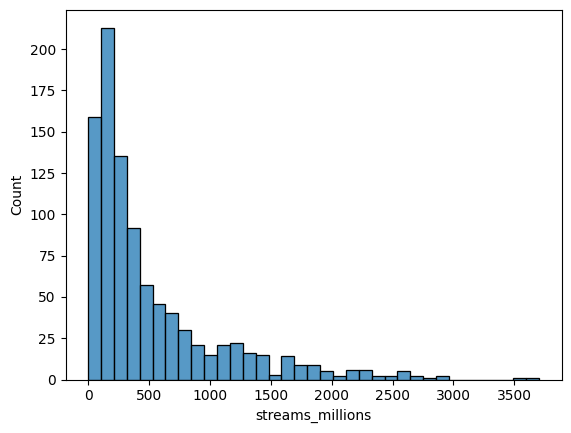

In [144]:
df["streams_millions"] = df["streams"] / 1000000
sb.histplot(data=df,x="streams_millions")

My Thought Process

- after checking the `streams` column, I noticed that some rows had characters other than numbers, so I removed those.  
- then I converted the column from strings to integers.  
- next, I divided the number of streams by one million to make the histogram and distribution easier to read.  
- looking at the histogram, the values are clearly right-skewed, which means a transformation (like log scaling) is needed to better understand the distribution.(to be added)
